In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [4]:


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [5]:
features_df = pd.read_csv("Features_data_set.csv")
print(features_df.head())
print('--------------------------------------------------------------------------------------')
stores_df = pd.read_csv("stores_data_set.csv")
print(stores_df.head())
print('--------------------------------------------------------------------------------------')
sales_df = pd.read_csv("sales_data_set.csv")
print(sales_df.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  
--------------------------------------------------------------------------------------
   Store Type    Size
0      1    A  15131

In [6]:
df1 =  pd.merge(sales_df, stores_df, how = 'left', on = ['Store'])
df2 =pd.merge(sales_df, features_df.drop(['IsHoliday'], axis = 1), how = 'left', on = ['Store', 'Date'])
df=pd.merge(df1, df2)

In [7]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,19/02/2010,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,26/02/2010,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,05/03/2010,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [9]:
df.shape

(421570, 16)

In [10]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [11]:
df.fillna(0,inplace = True)

In [12]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [13]:
# summary statistics of the dataset
df[['Weekly_Sales','Fuel_Price', 'Temperature', 'CPI', 'Size']].describe()

,Weekly_Sales,Fuel_Price,Temperature,CPI,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,15981.258123,3.361027,60.090059,171.201947,136727.915739
std,22711.183519,0.458515,18.447931,39.159276,60980.583328
min,-4988.940000,2.472000,-2.060000,126.064000,34875.000000
25%,2079.650000,2.933000,46.680000,132.022667,93638.000000
50%,7612.030000,3.452000,62.090000,182.318780,140167.000000
75%,20205.852500,3.738000,74.280000,212.416993,202505.000000
max,693099.360000,4.468000,100.140000,227.232807,219622.000000


  Type  Store
0    A     22
1    B     17
2    C      6


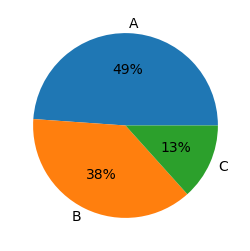

In [14]:
T = pd.DataFrame(df.groupby('Type')['Store'].nunique()).reset_index()
print(T)
plt.figure(figsize = (3,3))
plt.pie(T['Store'], labels = T['Type'], autopct = '%.0f%%')
plt.show()

<Axes: title={'center': 'size distribution of stores for each store type'}, xlabel='Type', ylabel='Size'>

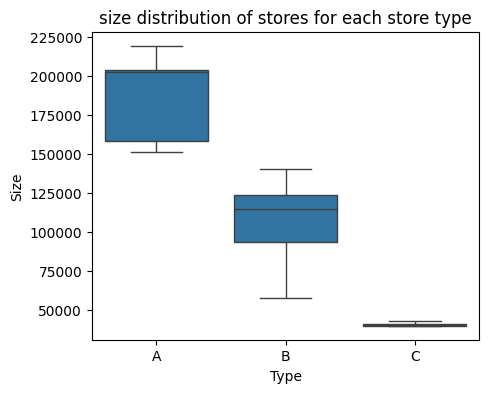

In [15]:
plt.figure(figsize = (5,4))
plt.title('size distribution of stores for each store type')
sns.boxplot(x = 'Type', y ='Size', data = df, showfliers = False)

<Axes: title={'center': 'Distribution of weekly sales based on store type'}, xlabel='Type', ylabel='Weekly_Sales'>

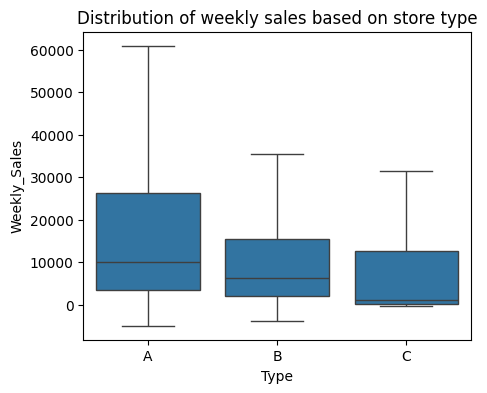

In [16]:
plt.figure(figsize = (5,4))
plt.title('Distribution of weekly sales based on store type')
sns.boxplot(x = 'Type', y ='Weekly_Sales', data = df, showfliers = False)

<Axes: title={'center': 'Impact of holidays on weekly sales'}, xlabel='IsHoliday', ylabel='Weekly_Sales'>

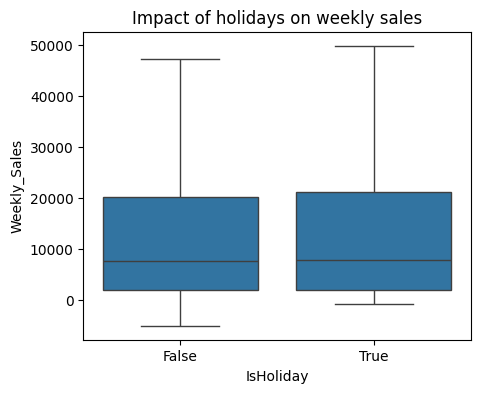

In [17]:
plt.figure(figsize = (5,4))
plt.title('Impact of holidays on weekly sales')
sns.boxplot(x = 'IsHoliday', y ='Weekly_Sales', data = df, showfliers = False)

In [18]:
df_1=pd.merge(sales_df, stores_df, on = 'Store', how = 'inner')

In [19]:
df_2=pd.merge(stores_df, features_df, on='Store', how='inner')

In [20]:
df_1['diff'] = df_1['Store'].astype(str) + '-' + df_1['Date']
df_2['diff'] = df_2['Store'].astype(str) + '-' + df_2['Date']

In [21]:
df_1.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff
421565,45,98,28/09/2012,508.37,False,B,118221,45-28/09/2012
421566,45,98,05/10/2012,628.10,False,B,118221,45-05/10/2012
421567,45,98,12/10/2012,1061.02,False,B,118221,45-12/10/2012
421568,45,98,19/10/2012,760.01,False,B,118221,45-19/10/2012
421569,45,98,26/10/2012,1076.80,False,B,118221,45-26/10/2012


In [22]:
df_2.tail()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
8185,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,45-28/06/2013
8186,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
8187,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
8188,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
8189,45,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [ ]:
# df1 have 2010 to 2012-oct data
# df2 have 2010 to 2013 data
# so we need to split (2010 to 2012-oct data) and (2012-nov to 2013 data) from df2
# and (2010 to 2012-oct data) add to df1

In [23]:
# make list with diff column for df1
df_1_list = df_1['diff'].to_list()

In [24]:
# filter 2010 to 2012-oct data from df1 based on df2_list
df_2_inlist = df_2[df_2['diff'].isin(df_1_list)]
df_2_inlist.reset_index(drop=True, inplace=True)
df_2_inlist.tail(5)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
6430,45,B,118221,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,45-28/09/2012
6431,45,B,118221,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,45-05/10/2012
6432,45,B,118221,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,45-12/10/2012
6433,45,B,118221,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,45-19/10/2012
6434,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,45-26/10/2012


In [25]:
# another filter for 2012-oct to 2013 data from df2 not in df1_list (~)
df_2notinlist = df_2[~df_2['diff'].isin(df_1_list)]
df_2notinlist.reset_index(drop=True, inplace=True)
df_2notinlist.tail(5)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
1750,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,45-28/06/2013
1751,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
1752,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
1753,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
1754,45,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [26]:
# merge df1 and df2(2010 to 2012-oct) data based on 'diff' column
# 'inner' - merge columns based on exact 'diff' in both dataframes
df_3 = pd.merge(df_1, df_2_inlist, on='diff', how='inner')
df_3.tail()

,Store_x,Dept,Date_x,Weekly_Sales,IsHoliday_x,Type_x,Size_x,diff,Store_y,Type_y,...,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421565,45,98,28/09/2012,508.37,False,B,118221,45-28/09/2012,45,B,...,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,05/10/2012,628.10,False,B,118221,45-05/10/2012,45,B,...,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,12/10/2012,1061.02,False,B,118221,45-12/10/2012,45,B,...,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,19/10/2012,760.01,False,B,118221,45-19/10/2012,45,B,...,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False
421569,45,98,26/10/2012,1076.80,False,B,118221,45-26/10/2012,45,B,...,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False


In [27]:
# drop the duplicate columns and rename it
df_3.drop(columns=['Store_y','Type_y','Size_y','Date_y','IsHoliday_y'], inplace=True)
df_3.rename(columns={'Store_x':'Store', 'Date_x':'Date', 'IsHoliday_x':'IsHoliday', 'Type_x':'Type', 'Size_x':'Size'}, inplace=True)
df_3.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,98,28/09/2012,508.37,False,B,118221,45-28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,05/10/2012,628.10,False,B,118221,45-05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,12/10/2012,1061.02,False,B,118221,45-12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,19/10/2012,760.01,False,B,118221,45-19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667
421569,45,98,26/10/2012,1076.80,False,B,118221,45-26/10/2012,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667


In [28]:
# 2012-nov to 2013 dataframe
df_2notinlist.tail(3)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
1752,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
1753,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
1754,45,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [29]:
# df1 (2010 to 2012-oct)           - 'Store', 'Date', 'Dept'
# df2_notinlist (2012-nov to 2013) - 'Store', 'Date'         - 'Dept' is missing

# so we need make df2_notinlist into 'Dept' wise data
# filter 'store' and 'dept' column from sales dataframe
dup_s = sales_df[['Store','Dept']]
dup_s

,Store,Dept
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
421565,45,98
421566,45,98
421567,45,98
421568,45,98


In [30]:
dup_s.drop_duplicates(subset=['Store', 'Dept'], inplace=True)
dup_s.reset_index(drop=True, inplace=True)
dup_s

C:\Users\Anupama\AppData\Local\Temp\ipykernel_16220\2425580011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_s.drop_duplicates(subset=['Store', 'Dept'], inplace=True)


,Store,Dept
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
3326,45,94
3327,45,95
3328,45,96
3329,45,97


In [31]:
# make dataframe of 's' and 'df2_notinlist (2012-nov to 2013)' based on 'store' column
# outer - it create rows for all combinations like (store,dept,date,etc.,)

df_4 = pd.merge(dup_s, df_2notinlist, on='Store', how='outer')
df_4.tail()

,Store,Dept,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,diff
129904,45,98,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,45-28/06/2013
129905,45,98,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,45-05/07/2013
129906,45,98,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,45-12/07/2013
129907,45,98,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,45-19/07/2013
129908,45,98,B,118221,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,45-26/07/2013


In [32]:
# concatinate both dataframes into single dataframe (2010 to 2013)

df_5 = pd.concat([df_3, df_4])
df_5.reset_index(drop=True, inplace=True)
df_5.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,45,98,28/06/2013,NaN,False,B,118221,45-28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
551475,45,98,05/07/2013,NaN,False,B,118221,45-05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
551476,45,98,12/07/2013,NaN,False,B,118221,45-12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
551477,45,98,19/07/2013,NaN,False,B,118221,45-19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN
551478,45,98,26/07/2013,NaN,False,B,118221,45-26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [33]:
# Datatype conversion using pandas
df_5['Date'] = df_5['Date'].apply(lambda x: x.replace('/','-'))
df_5['Date'] = pd.to_datetime(df_5['Date'], format='%d-%m-%Y', errors='coerce')

# encoding for catagorical features into numerical
df_5['IsHoliday'] = df_5['IsHoliday'].map({True:1, False:0})
df_5['Type'] = df_5['Type'].map({'A':1, 'B':2, 'C':3})

df_5.tail(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,diff,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551476,45,98,2013-07-12,NaN,0,2,118221,45-12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
551477,45,98,2013-07-19,NaN,0,2,118221,45-19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN
551478,45,98,2013-07-26,NaN,0,2,118221,45-26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [34]:
# drop 'diff' column and sort the dataframe in ascending order

df_5.drop(columns=['diff'], inplace=True)

df_5 = df_5.sort_values(by=['Date','Store','Dept'])
df_5.reset_index(drop=True, inplace=True)

df_5.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,45,94,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,45,95,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,45,96,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,45,97,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,45,98,2013-07-26,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [35]:
# make Date feature into --> Day,Month,Year new features and drop Date column

df_5['Day'] = df_5['Date'].dt.day
df_5['Month'] = df_5['Date'].dt.month
df_5['Year'] = df_5['Date'].dt.year
df_5.drop(columns=['Date'], inplace=True)
df_5

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
0,1,1,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
1,1,2,50605.27,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
2,1,3,13740.12,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
3,1,4,39954.04,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
4,1,5,32229.38,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551475,45,95,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551476,45,96,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013
551477,45,97,NaN,0,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26,7,2013


In [36]:
# rearrange the columns order

df_5 = df_5[['Day','Month','Year','Store','Dept','Type','Weekly_Sales','Size','IsHoliday','Temperature',
           'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']]
df_5.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [37]:
# check datatypes of all features and everything in numerical
df_5.dtypes

Day               int32
Month             int32
Year              int32
Store             int64
Dept              int64
Type              int64
Weekly_Sales    float64
Size              int64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [38]:
# check null values of all features --> weekly_sales, markdown, cpi, unemplyment feature have null values
df_5.isnull().sum()

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    129909
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
dtype: int64

In [39]:
df_5.describe()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,421570.000000,551479.000000,551479.000000,551479.000000,551479.000000,280405.000000,207897.000000,254619.000000,248649.000000,281341.000000,508176.000000,508176.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,15981.258123,136073.691863,0.071905,58.703624,3.413010,7369.403469,3489.575965,1859.728572,3355.891061,4261.631495,172.200115,7.775470
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22711.183519,61207.331445,0.258330,18.685408,0.427725,9439.253385,8920.862286,11633.662079,6889.409946,13679.851274,39.595683,1.863253
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,-4988.940000,34875.000000,0.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,2079.650000,93638.000000,0.000000,45.160000,3.050000,2014.470000,74.240000,7.330000,319.190000,1524.870000,132.529129,6.614000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7612.030000,128107.000000,0.000000,59.940000,3.524000,5011.720000,397.960000,41.390000,1202.440000,2825.360000,182.517732,7.771000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,20205.852500,202505.000000,0.000000,73.160000,3.746000,9264.480000,2359.440000,177.270000,3380.280000,4930.020000,213.871114,8.549000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [40]:
# check negative weekly_sales count
df_5[df_5['Weekly_Sales']<=0]

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
389,5,2,2010,6,47,1,-59.00,202505,0,40.43,2.572,NaN,NaN,NaN,NaN,NaN,212.622352,7.259
601,5,2,2010,9,49,2,-15.00,125833,0,38.01,2.572,NaN,NaN,NaN,NaN,NaN,214.655459,6.415
714,5,2,2010,11,19,1,0.00,207499,0,46.04,2.572,NaN,NaN,NaN,NaN,NaN,214.424881,7.368
1039,5,2,2010,15,80,2,-0.04,123737,0,19.83,2.954,NaN,NaN,NaN,NaN,NaN,131.527903,8.350
1345,5,2,2010,20,19,1,0.00,203742,0,25.92,2.784,NaN,NaN,NaN,NaN,NaN,204.247194,8.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419896,26,10,2012,19,47,1,-18.00,203819,0,56.49,4.071,5430.75,90.07,NaN,904.34,1665.77,138.728161,7.992
419943,26,10,2012,20,19,1,-3.97,203742,0,60.04,3.882,10813.19,22.33,102.91,867.39,1671.76,216.151590,7.293
420601,26,10,2012,29,80,2,-178.15,93638,0,57.58,3.917,5581.80,2.98,NaN,398.23,396.11,138.728161,9.151
420972,26,10,2012,35,80,2,-16.51,103681,0,58.99,3.882,6221.06,42.48,103.00,273.90,996.79,142.762411,8.665


In [41]:
# negative weekly_sales value convert to null value

df_5['Weekly_Sales'] = df_5['Weekly_Sales'].apply(lambda x: np.nan if x<=0 else x)
df_5.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [42]:
df_5.describe()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,420212.000000,551479.000000,551479.000000,551479.000000,551479.000000,280405.000000,207897.000000,254619.000000,248649.000000,281341.000000,508176.000000,508176.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,16033.114591,136073.691863,0.071905,58.703624,3.413010,7369.403469,3489.575965,1859.728572,3355.891061,4261.631495,172.200115,7.775470
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22729.492116,61207.331445,0.258330,18.685408,0.427725,9439.253385,8920.862286,11633.662079,6889.409946,13679.851274,39.595683,1.863253
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,0.010000,34875.000000,0.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,2120.130000,93638.000000,0.000000,45.160000,3.050000,2014.470000,74.240000,7.330000,319.190000,1524.870000,132.529129,6.614000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7661.700000,128107.000000,0.000000,59.940000,3.524000,5011.720000,397.960000,41.390000,1202.440000,2825.360000,182.517732,7.771000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,20271.265000,202505.000000,0.000000,73.160000,3.746000,9264.480000,2359.440000,177.270000,3380.280000,4930.020000,213.871114,8.549000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [43]:
# check null values of all features
df_5.isnull().sum()

Day                  0
Month                0
Year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    131267
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
dtype: int64

In [44]:
# MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5 - features have huge number of null values compare to other features
df_5.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [45]:
# create 'markdown' column for --> all markdowns are null means 0, otherwise 1 (any one markdown have value)

df_5['markdown'] = df_5[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].notnull().any(axis=1).astype(int)
df_5.head()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,markdown
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0


In [46]:
# check weekly_sales average --> holiday(1) and non-holiday(0)
df_5.groupby('markdown')['Weekly_Sales'].mean()

markdown
0    15922.137810
1    16231.116041
Name: Weekly_Sales, dtype: float64

In [47]:
df_5.describe()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,markdown
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,420212.000000,551479.000000,551479.000000,551479.000000,551479.000000,280405.000000,207897.000000,254619.000000,248649.000000,281341.000000,508176.000000,508176.000000,551479.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,16033.114591,136073.691863,0.071905,58.703624,3.413010,7369.403469,3489.575965,1859.728572,3355.891061,4261.631495,172.200115,7.775470,0.510157
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22729.492116,61207.331445,0.258330,18.685408,0.427725,9439.253385,8920.862286,11633.662079,6889.409946,13679.851274,39.595683,1.863253,0.499897
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,0.010000,34875.000000,0.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,0.000000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,2120.130000,93638.000000,0.000000,45.160000,3.050000,2014.470000,74.240000,7.330000,319.190000,1524.870000,132.529129,6.614000,0.000000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7661.700000,128107.000000,0.000000,59.940000,3.524000,5011.720000,397.960000,41.390000,1202.440000,2825.360000,182.517732,7.771000,1.000000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,20271.265000,202505.000000,0.000000,73.160000,3.746000,9264.480000,2359.440000,177.270000,3380.280000,4930.020000,213.871114,8.549000,1.000000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,1.000000


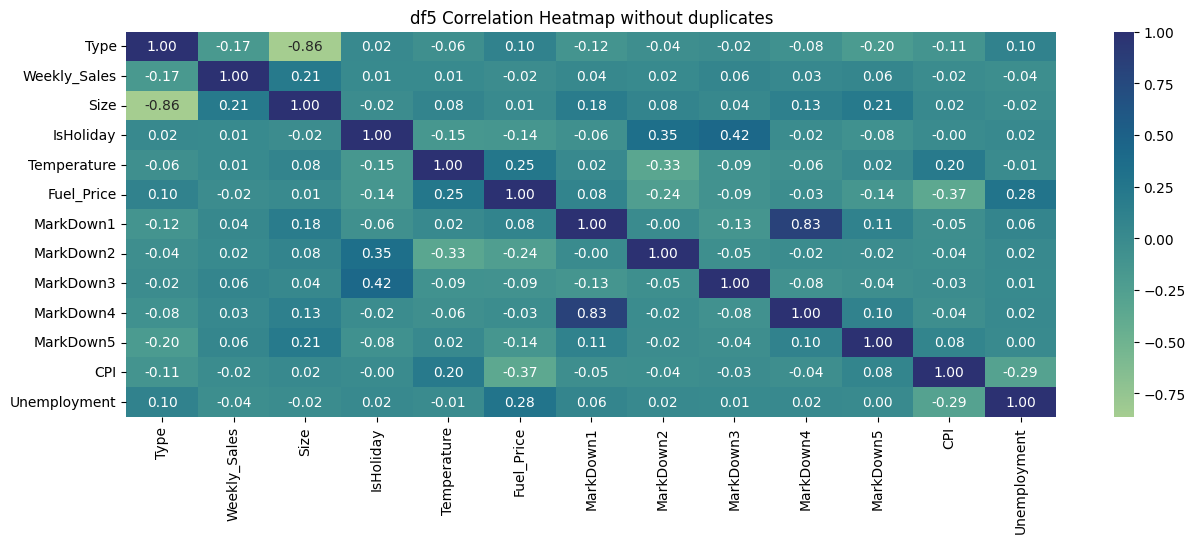

In [48]:
# Calculate the correlation matrix & heatmap after removing duplicates:
df5_corr = df_5.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept','markdown']).dropna().corr()
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(df5_corr,cmap='crest',annot=True, fmt=".2f")
plt.title("df5 Correlation Heatmap without duplicates")
plt.show()

In [48]:
# make unique column of the dataframe - 'diff'

df_5['diff'] = df_5['Day'].astype(str)+df_5['Month'].astype(str)+df_5['Year'].astype(str)+'-'+df_5['Store'].astype(str)+'-'+df_5['Dept'].astype(str)
df_5.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,markdown,diff
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,1,2672013-45-98


In [49]:
# MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5 - features have huge number of null values compare to other features

# so need create 2 different models to predict weekly_sales and compare the performance of both model
# model 1 --> with all MarkDowns(1-5) to predict weekly_sales
# model 2 --> without MarkDowns(1-5) to predict weekly_sales
# check number of unique values in each features
df_5.nunique()

Day                 31
Month               12
Year                 4
Store               45
Dept                81
Type                 3
Weekly_Sales    358785
Size                40
IsHoliday            2
Temperature       4178
Fuel_Price        1011
MarkDown1         4023
MarkDown2         2715
MarkDown3         2885
MarkDown4         3405
MarkDown5         4045
CPI               2505
Unemployment       404
markdown             2
diff            551479
dtype: int64

In [ ]:
# # Model 1 - with Markdown

In [50]:
# steps:
# make new dataframe for only not-null value columns
# train Machine learning model and predict 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5' all are separately
# now add all MarkDown(1-5) values into dataframe based on 'diff' column
# repeat and predict 'cpi'
# repeat and predict 'unemplyment'
# finally repeat and predict 'weekly_sales'
# find Training and Testing accuracy of algorithm

def algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, algorithm):

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy = {'algorithm': algorithm.__name__,
                'R2_train' : r2_train,
                'R2_test'  : r2_test}

    return accuracy

In [51]:
# check different algorithms and predict null values using best algorithm (Random Forest performs well compare to others)

def ml_regression(df, null_features, label):

    # only label column with null values and drop the other null columns from df
    df = df.drop(columns=null_features)

    # filter null values into separate dataframe and reset index order
    df_null = df[df[label].isnull()]
    df_null.reset_index(drop=True, inplace=True)

    # also filter non-null values into separate dataframe and reset index order
    df_notnull = df[df[label].notnull()]
    df_notnull.reset_index(drop=True, inplace=True)

    # make vector(x) and label(y) variables
    x = df_notnull.drop(columns=[label, 'diff'], axis=1)
    y = df_notnull[label]
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    # calculate Training and Testing accuracy of different algorithms and evaluate model performance using metrics
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, DecisionTreeRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, ExtraTreesRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, RandomForestRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, AdaBoostRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, GradientBoostingRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, XGBRegressor))

    # Random Forest algorithm performs well to predict unseen data
    model = RandomForestRegressor().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # evaluate model performance using metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'R2': r2,
              'Mean Absolute Error': mae,
              'Mean Squared Error': mse,
              'Root Mean Squared Error': rmse}
    print(metrics)

    # predict null values using model
    y_pred = model.predict(df_null.drop(columns=[label, 'diff'], axis=1))

    # make dataframe of predicted label value and merge with non-null values
    df_null[label] = pd.DataFrame(y_pred)
    df_final = pd.concat([df_null,df_notnull], axis=0, ignore_index=True)
    return df_final

In [52]:
# drop the 'markdown' column and copy to new variable

df_m1 = df_5.copy()
df_m1.drop(columns=['markdown'],inplace=True)
df_m1.tail()


,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,diff
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-98


In [53]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown1'

df_markdown1 = ml_regression(df_m1, ['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown1')
df_markdown1

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.999999963114303}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.999999999670352, 'R2_test': 0.9999999963073145}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.13393838602291575, 'R2_test': 0.15654289504022179}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7328854690525646, 'R2_test': 0.7356472560550741}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9829894411143196, 'R2_test': 0.9827814393570967}
{'R2': 1.0, 'Mean Absolute Error': 9.244499577497748e-12, 'Mean Squared Error': 3.225172572585865e-22, 'Root Mean Squared Error': 1.7958765471451163e-11}


C:\Users\Anupama\AppData\Local\Temp\ipykernel_17360\1471940862.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[label] = pd.DataFrame(y_pred)


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,7154.4733,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,7154.4733,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,7154.4733,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,7154.4733,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,7154.4733,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,212.0200,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,212.0200,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,212.0200,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,212.0200,2672013-45-97


In [54]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown2'

df_markdown2 = ml_regression(df_m1, ['Weekly_Sales','MarkDown1','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown2')
df_markdown2

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999894061675}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9999999999998235, 'R2_test': 0.9999999999992707}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.42441687751170765, 'R2_test': 0.40742338007431167}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8583236575119892, 'R2_test': 0.8531673429046566}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9987127784289968, 'R2_test': 0.9986624033622861}
{'R2': 1.0, 'Mean Absolute Error': 4.015263416620157e-12, 'Mean Squared Error': 1.632925570909561e-22, 'Root Mean Squared Error': 1.277859761832088e-11}


C:\Users\Anupama\AppData\Local\Temp\ipykernel_17360\1471940862.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[label] = pd.DataFrame(y_pred)


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown2,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,6710.3144,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,6710.3144,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,6710.3144,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,6710.3144,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,6710.3144,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,851.7300,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,851.7300,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,851.7300,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,851.7300,2672013-45-97


In [55]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown3'

df_markdown3 = ml_regression(df_m1, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown4','MarkDown5','CPI','Unemployment'], 'MarkDown3')
df_markdown3

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999999935327}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9999999999991782, 'R2_test': 0.9999999999984093}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.898572170844528, 'R2_test': 0.9015592293923061}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9247814346124927, 'R2_test': 0.9249349111959402}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9999600978893889, 'R2_test': 0.9999594604436224}
{'R2': 0.9999999999980023, 'Mean Absolute Error': 0.0004534816612213153, 'Mean Squared Error': 0.0002758815095043233, 'Root Mean Squared Error': 0.016609681198154386}


C:\Users\Anupama\AppData\Local\Temp\ipykernel_17360\1471940862.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[label] = pd.DataFrame(y_pred)


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown3,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,146.1528,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,146.1528,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,146.1528,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,146.1528,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,146.1528,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,2.0600,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,2.0600,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,2.0600,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,2.0600,2672013-45-97


In [56]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown4'

df_markdown4 = ml_regression(df_m1, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown5','CPI','Unemployment'], 'MarkDown4')
df_markdown4

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.999999997516504}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9999999999923126, 'R2_test': 0.9999999999628334}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.5465208680031327, 'R2_test': 0.5570636750936953}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7897004104645765, 'R2_test': 0.7947015822917547}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9921265472567694, 'R2_test': 0.9920267462123961}
{'R2': 0.9999999996706521, 'Mean Absolute Error': 0.0018137281359995592, 'Mean Squared Error': 0.016133591101735262, 'Root Mean Squared Error': 0.12701807391759357}


C:\Users\Anupama\AppData\Local\Temp\ipykernel_17360\1471940862.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[label] = pd.DataFrame(y_pred)


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown4,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,16555.1451,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,16555.1451,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,16555.1451,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,16555.1451,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,16555.1451,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,10.8800,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,10.8800,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,10.8800,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,10.8800,2672013-45-97


In [57]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'MarkDown5'

df_markdown5 = ml_regression(df_m1, ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','CPI','Unemployment'], 'MarkDown5')
df_markdown5

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999988518107}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.7671861132543648, 'R2_test': 0.8061226156831478}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.85538462388852, 'R2_test': 0.8658268189876881}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9967966861692091, 'R2_test': 0.9972315628762662}
{'R2': 1.0, 'Mean Absolute Error': 4.855032100616934e-12, 'Mean Squared Error': 7.161897721567987e-23, 'Root Mean Squared Error': 8.462799608621243e-12}


C:\Users\Anupama\AppData\Local\Temp\ipykernel_17360\1471940862.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[label] = pd.DataFrame(y_pred)


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown5,diff
0,5,2,2010,1,1,1,151315,0,42.31,2.572,4661.7369,522010-1-1
1,5,2,2010,1,2,1,151315,0,42.31,2.572,4661.7369,522010-1-2
2,5,2,2010,1,3,1,151315,0,42.31,2.572,4661.7369,522010-1-3
3,5,2,2010,1,4,1,151315,0,42.31,2.572,4661.7369,522010-1-4
4,5,2,2010,1,5,1,151315,0,42.31,2.572,4661.7369,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,118221,0,76.06,3.804,1864.5700,2672013-45-94
551475,26,7,2013,45,95,2,118221,0,76.06,3.804,1864.5700,2672013-45-95
551476,26,7,2013,45,96,2,118221,0,76.06,3.804,1864.5700,2672013-45-96
551477,26,7,2013,45,97,2,118221,0,76.06,3.804,1864.5700,2672013-45-97


In [58]:
df_m1

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,diff
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-1
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-2
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-3
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-4
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,522010-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,2672013-45-97


In [59]:
# remove all old MarkDown(1-5) columns from df_m1

df_m1 = df_m1.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)
df_m1.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,diff
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-98


In [60]:
# now merge all new predicted 'MarkDown(1-5)' columns --> one by one with df_m1 dataframe --> based on 'diff' column

df_m1 = pd.merge(df_m1, df_markdown1[['MarkDown1', 'diff']], on='diff', how='inner')
df_m1 = pd.merge(df_m1, df_markdown2[['MarkDown2', 'diff']], on='diff', how='inner')
df_m1 = pd.merge(df_m1, df_markdown3[['MarkDown3', 'diff']], on='diff', how='inner')
df_m1 = pd.merge(df_m1, df_markdown4[['MarkDown4', 'diff']], on='diff', how='inner')
df_m1 = pd.merge(df_m1, df_markdown5[['MarkDown5', 'diff']], on='diff', how='inner')
df_m1

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,211.096358,8.106,522010-1-1,7154.4733,6710.3144,146.1528,16555.1451,4661.7369
1,5,2,2010,1,2,1,50605.27,151315,0,42.31,2.572,211.096358,8.106,522010-1-2,7154.4733,6710.3144,146.1528,16555.1451,4661.7369
2,5,2,2010,1,3,1,13740.12,151315,0,42.31,2.572,211.096358,8.106,522010-1-3,7154.4733,6710.3144,146.1528,16555.1451,4661.7369
3,5,2,2010,1,4,1,39954.04,151315,0,42.31,2.572,211.096358,8.106,522010-1-4,7154.4733,6710.3144,146.1528,16555.1451,4661.7369
4,5,2,2010,1,5,1,32229.38,151315,0,42.31,2.572,211.096358,8.106,522010-1-5,7154.4733,6710.3144,146.1528,16555.1451,4661.7369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-94,212.0200,851.7300,2.0600,10.8800,1864.5700
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-95,212.0200,851.7300,2.0600,10.8800,1864.5700
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-96,212.0200,851.7300,2.0600,10.8800,1864.5700
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-97,212.0200,851.7300,2.0600,10.8800,1864.5700


In [61]:
# next train Machine learning model with df_m1 --> to predict 'CPI'

df_cpi = ml_regression(df_m1, ['Weekly_Sales','Unemployment'], 'CPI')
df_cpi

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.5087558123389038, 'R2_test': 0.5105661242541618}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9865108105045274, 'R2_test': 0.9864405256299024}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9999786092636105, 'R2_test': 0.9999781425090227}
{'R2': 1.0, 'Mean Absolute Error': 4.3482122180871836e-10, 'Mean Squared Error': 3.798035082433995e-16, 'Root Mean Squared Error': 1.9488548130720244e-08}


C:\Users\Anupama\AppData\Local\Temp\ipykernel_17360\1471940862.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[label] = pd.DataFrame(y_pred)


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,CPI,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,3,5,2013,1,1,1,151315,0,66.66,3.386,225.162634,352013-1-1,2298.63,2.0000,129.90,55.46,1301.04
1,3,5,2013,1,2,1,151315,0,66.66,3.386,225.162634,352013-1-2,2298.63,2.0000,129.90,55.46,1301.04
2,3,5,2013,1,3,1,151315,0,66.66,3.386,225.162634,352013-1-3,2298.63,2.0000,129.90,55.46,1301.04
3,3,5,2013,1,4,1,151315,0,66.66,3.386,225.162634,352013-1-4,2298.63,2.0000,129.90,55.46,1301.04
4,3,5,2013,1,5,1,151315,0,66.66,3.386,225.162634,352013-1-5,2298.63,2.0000,129.90,55.46,1301.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,4,2013,45,94,2,118221,0,50.64,3.615,193.589304,2642013-45-94,1260.65,456.1402,57.52,40.51,2476.18
551475,26,4,2013,45,95,2,118221,0,50.64,3.615,193.589304,2642013-45-95,1260.65,456.1402,57.52,40.51,2476.18
551476,26,4,2013,45,96,2,118221,0,50.64,3.615,193.589304,2642013-45-96,1260.65,456.1402,57.52,40.51,2476.18
551477,26,4,2013,45,97,2,118221,0,50.64,3.615,193.589304,2642013-45-97,1260.65,456.1402,57.52,40.51,2476.18


In [62]:
# drop old 'CPI' column and merge the new predicted 'CPI' columns with df_m1 --> based on 'diff' column

df_m1 = df_m1.drop(columns=['CPI'], axis=1)
df_m1 = pd.merge(df_m1, df_cpi[['CPI', 'diff']], on='diff', how='inner')
df_m1.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,Unemployment,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-94,212.02,851.73,2.06,10.88,1864.57,193.264581
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-95,212.02,851.73,2.06,10.88,1864.57,193.264581
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-96,212.02,851.73,2.06,10.88,1864.57,193.264581
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-97,212.02,851.73,2.06,10.88,1864.57,193.264581
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-98,212.02,851.73,2.06,10.88,1864.57,193.264581


In [63]:
# next train Machine learning model with df_m1 --> to predict 'Unemployment'

df_unemployment = ml_regression(df_m1, ['Weekly_Sales'], 'Unemployment')
df_unemployment

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.4948700999139567, 'R2_test': 0.49639783883916033}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9582804006323798, 'R2_test': 0.9583686954085631}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9996162384098505, 'R2_test': 0.9996116807483796}
{'R2': 1.0, 'Mean Absolute Error': 2.1543740374951502e-14, 'Mean Squared Error': 9.139750842092196e-28, 'Root Mean Squared Error': 3.0232020842299305e-14}


C:\Users\Anupama\AppData\Local\Temp\ipykernel_17360\1471940862.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[label] = pd.DataFrame(y_pred)


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,Unemployment,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI
0,3,5,2013,1,1,1,151315,0,66.66,3.386,6.314,352013-1-1,2298.63,2.0000,129.90,55.46,1301.04,225.162634
1,3,5,2013,1,2,1,151315,0,66.66,3.386,6.314,352013-1-2,2298.63,2.0000,129.90,55.46,1301.04,225.162634
2,3,5,2013,1,3,1,151315,0,66.66,3.386,6.314,352013-1-3,2298.63,2.0000,129.90,55.46,1301.04,225.162634
3,3,5,2013,1,4,1,151315,0,66.66,3.386,6.314,352013-1-4,2298.63,2.0000,129.90,55.46,1301.04,225.162634
4,3,5,2013,1,5,1,151315,0,66.66,3.386,6.314,352013-1-5,2298.63,2.0000,129.90,55.46,1301.04,225.162634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,4,2013,45,94,2,118221,0,50.64,3.615,8.335,2642013-45-94,1260.65,456.1402,57.52,40.51,2476.18,193.589304
551475,26,4,2013,45,95,2,118221,0,50.64,3.615,8.335,2642013-45-95,1260.65,456.1402,57.52,40.51,2476.18,193.589304
551476,26,4,2013,45,96,2,118221,0,50.64,3.615,8.335,2642013-45-96,1260.65,456.1402,57.52,40.51,2476.18,193.589304
551477,26,4,2013,45,97,2,118221,0,50.64,3.615,8.335,2642013-45-97,1260.65,456.1402,57.52,40.51,2476.18,193.589304


In [64]:
# drop old 'Unemployment' column and merge the new predicted 'Unemployment' columns with df_m1 --> based on 'diff' column

df_m1 = df_m1.drop(columns=['Unemployment'], axis=1)
df_m1 = pd.merge(df_m1, df_unemployment[['Unemployment', 'diff']], on='diff', how='inner')
df_m1.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,2672013-45-94,212.02,851.73,2.06,10.88,1864.57,193.264581,8.67567
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,2672013-45-95,212.02,851.73,2.06,10.88,1864.57,193.264581,8.67567
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,2672013-45-96,212.02,851.73,2.06,10.88,1864.57,193.264581,8.67567
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,2672013-45-97,212.02,851.73,2.06,10.88,1864.57,193.264581,8.67567
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,2672013-45-98,212.02,851.73,2.06,10.88,1864.57,193.264581,8.67567


In [65]:
# finally train Machine learning model with df_m1 --> to predict 'Weekly_Sales'

df_weekly_sales = ml_regression(df_m1, [], 'Weekly_Sales')
df_weekly_sales

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9500438553407756}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9796167649538503}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.996355218634551, 'R2_test': 0.9748968826153794}
{'algorithm': 'AdaBoostRegressor', 'R2_train': -0.27856944254315286, 'R2_test': -0.30347897861789774}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7497047054327237, 'R2_test': 0.7498694605131595}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9509405186791112, 'R2_test': 0.9464694033211581}
{'R2': 0.9743548189029778, 'Mean Absolute Error': 1432.0345589864712, 'Mean Squared Error': 13000722.086745698, 'Root Mean Squared Error': 3605.651409488402}


C:\Users\Anupama\AppData\Local\Temp\ipykernel_17360\1471940862.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[label] = pd.DataFrame(y_pred)


,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,diff,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,6,47,1,192.1216,202505,0,40.43,2.572,522010-6-47,7197.3088,5513.5876,36.9526,43455.8036,7376.2599,212.622352,7.259
1,5,2,2010,9,49,2,41.9757,125833,0,38.01,2.572,522010-9-49,5624.1288,1957.9940,66.9179,7287.3701,3995.8052,214.655459,6.415
2,5,2,2010,11,19,1,431.9587,207499,0,46.04,2.572,522010-11-19,10268.1291,4811.4935,47.4185,43243.5354,6755.2300,214.424881,7.368
3,5,2,2010,15,80,2,42.7172,123737,0,19.83,2.954,522010-15-80,6043.9571,13266.3665,79.2923,8555.0190,4454.3955,131.527903,8.350
4,5,2,2010,20,19,1,158.4179,203742,0,25.92,2.784,522010-20-19,10262.1698,5951.7737,43.3802,61759.7353,7176.6804,204.247194,8.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,10,2012,45,93,2,2487.8000,118221,0,58.85,3.882,26102012-45-93,4018.9100,58.0800,100.0000,211.9400,858.3300,192.308899,8.667
551475,26,10,2012,45,94,2,5203.3100,118221,0,58.85,3.882,26102012-45-94,4018.9100,58.0800,100.0000,211.9400,858.3300,192.308899,8.667
551476,26,10,2012,45,95,2,56017.4700,118221,0,58.85,3.882,26102012-45-95,4018.9100,58.0800,100.0000,211.9400,858.3300,192.308899,8.667
551477,26,10,2012,45,97,2,6817.4800,118221,0,58.85,3.882,26102012-45-97,4018.9100,58.0800,100.0000,211.9400,858.3300,192.308899,8.667


In [66]:
df_m1_weekly_sales = df_weekly_sales.copy()
df_m1_weekly_sales.describe()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,15632.818932,136073.691863,0.071905,58.703624,3.413010,7039.897842,3040.666984,1248.542743,3203.705114,4796.838124,172.628461,7.701336
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22600.260996,61207.331445,0.258330,18.685408,0.427725,7999.382029,7643.159713,9322.434776,6307.439552,11225.088784,39.771746,1.862790
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,0.010000,34875.000000,0.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,1841.000000,93638.000000,0.000000,45.160000,3.050000,2459.510000,78.986600,8.930000,249.812300,2062.040000,132.693226,6.529000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7252.320000,128107.000000,0.000000,59.940000,3.524000,5479.504700,281.300000,32.739300,1265.912500,3570.810000,182.544590,7.706000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,19803.885000,202505.000000,0.000000,73.160000,3.746000,8819.300400,1942.150000,106.950000,3307.621600,5436.311000,214.417648,8.523000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [67]:
df_m1_weekly_sales.drop(columns = ['diff'],inplace=True)
df_m1_weekly_sales.tail(3)

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
551476,26,10,2012,45,95,2,56017.47,118221,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
551477,26,10,2012,45,97,2,6817.48,118221,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
551478,26,10,2012,45,98,2,1076.80,118221,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [68]:
df_m1_weekly_sales.dtypes

Day               int32
Month             int32
Year              int32
Store             int64
Dept              int64
Type              int64
Weekly_Sales    float64
Size              int64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

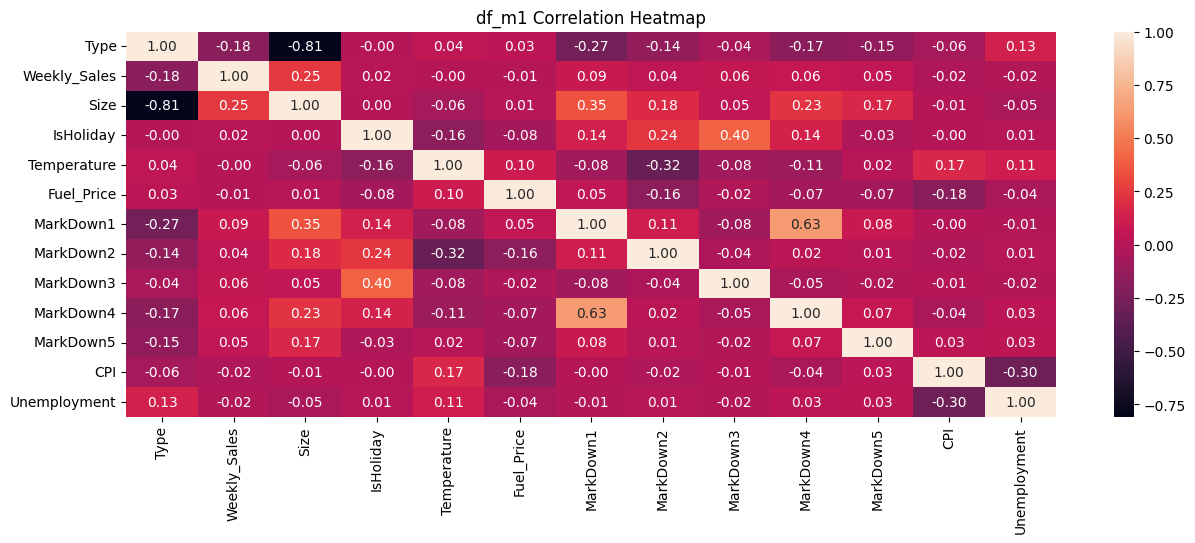

In [69]:
# Calculate the correlation matrix and heartmap:
df_m1_corr = df_m1_weekly_sales.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept']).dropna().corr()
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(df_m1_corr, annot=True, fmt=".2f")
plt.title("df_m1 Correlation Heatmap")
plt.show()

In [70]:
# This heatmap also shows 'Type' and 'Size' features have high correlaton and also relationship with weekly_sales.
# other features are weak correlation with weekly_sales.
# filter null values into separate dataframe and reset index order
df_null = df_m1[df_m1['Weekly_Sales'].isnull()]
df_null.reset_index(drop=True, inplace=True)

# also filter non-null values into separate dataframe and reset index order
df_notnull = df_m1[df_m1['Weekly_Sales'].notnull()]
df_notnull.reset_index(drop=True, inplace=True)

# make vector(x) and label(y) variables
x = df_notnull.drop(columns=['Weekly_Sales', 'diff'], axis=1)
y = df_notnull['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Random Forest algorithm performs well to predict unseen data
model = RandomForestRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluate model performance using metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

print(metrics)

{'R2': 0.9744140338340876, 'Mean Absolute Error': 1430.1066374534464, 'Mean Squared Error': 12970703.314024512, 'Root Mean Squared Error': 3601.486264589178}


In [71]:
import pickle

# save the model to pickle
with open("model1_markdown.pkl", 'wb') as f:
     pickle.dump(model, f)

In [ ]:
## Model without markdown:

In [72]:
# steps:
# make new dataframe for only not-null value columns
# train Machine learning model and 'cpi'
# repeat and predict 'unemplyment'
# finally repeat and predict 'weekly_sales'
# find Training and Testing accuracy of algorithm

def algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, algorithm):

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy = {'algorithm': algorithm.__name__,
                'R2_train' : r2_train,
                'R2_test'  : r2_test}

    return accuracy

In [73]:
# check different algorithms and predict null values using best algorithm (Random Forest performs well compare to others)

def ml_regression(df, null_features, label):

    # only label column with null values and drop the other null columns from df
    df = df.drop(columns=null_features)

    # filter null values into separate dataframe and reset index order
    df_null = df[df[label].isnull()]
    df_null.reset_index(drop=True, inplace=True)

    # also filter non-null values into separate dataframe and reset index order
    df_notnull = df[df[label].notnull()]
    df_notnull.reset_index(drop=True, inplace=True)

    # make vector(x) and label(y) variables
    x = df_notnull.drop(columns=[label, 'diff'], axis=1)
    y = df_notnull[label]
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    # calculate Training and Testing accuracy of different algorithms and evaluate model performance using metrics
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, DecisionTreeRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, ExtraTreesRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, RandomForestRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, AdaBoostRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, GradientBoostingRegressor))
    print(algorithm_train_test_accuracy(x_train, x_test, y_train, y_test, XGBRegressor))

    # Random Forest algorithm performs well to predict unseen data
    model = RandomForestRegressor().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # evaluate model performance using metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'R2': r2,
              'Mean Absolute Error': mae,
              'Mean Squared Error': mse,
              'Root Mean Squared Error': rmse}
    print(metrics)

    # predict null values using model
    y_pred = model.predict(df_null.drop(columns=[label, 'diff'], axis=1))

    # make dataframe of predicted label value and merge with non-null values
    df_null[label] = pd.DataFrame(y_pred)
    df_final = pd.concat([df_null,df_notnull], axis=0, ignore_index=True)
    return df_final

In [74]:
# drop all MarkDown(1-5) columns
df_m2 = df_5.copy()
df_m2.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','markdown'],inplace=True)
df_m2.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,diff
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-97
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,NaN,NaN,2672013-45-98


In [75]:
# make new dataframe for only not-null value columns and train Machine learning model to predict 'CPI'

df_m2_cpi = ml_regression(df_m2, ['Weekly_Sales','Unemployment'], 'CPI')
df_m2_cpi

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 0.9999999999999458}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.5175083699798277, 'R2_test': 0.519329708575129}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9862542573066267, 'R2_test': 0.986164892030803}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9999736020379673, 'R2_test': 0.999973206568554}
{'R2': 1.0, 'Mean Absolute Error': 2.0422084355851026e-13, 'Mean Squared Error': 5.675876622439866e-26, 'Root Mean Squared Error': 2.3824098351123105e-13}


C:\Users\Anupama\AppData\Local\Temp\ipykernel_17360\1471940862.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[label] = pd.DataFrame(y_pred)


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,CPI,diff
0,3,5,2013,1,1,1,151315,0,66.66,3.386,225.158453,352013-1-1
1,3,5,2013,1,2,1,151315,0,66.66,3.386,225.158453,352013-1-2
2,3,5,2013,1,3,1,151315,0,66.66,3.386,225.158453,352013-1-3
3,3,5,2013,1,4,1,151315,0,66.66,3.386,225.158453,352013-1-4
4,3,5,2013,1,5,1,151315,0,66.66,3.386,225.158453,352013-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,4,2013,45,94,2,118221,0,50.64,3.615,193.589304,2642013-45-94
551475,26,4,2013,45,95,2,118221,0,50.64,3.615,193.589304,2642013-45-95
551476,26,4,2013,45,96,2,118221,0,50.64,3.615,193.589304,2642013-45-96
551477,26,4,2013,45,97,2,118221,0,50.64,3.615,193.589304,2642013-45-97


In [76]:
# drop old 'CPI' column and merge the new predicted 'CPI' columns with df_m2 --> based on 'diff' column

df_m2 = df_m2.drop(columns=['CPI'], axis=1)
df_m2 = pd.merge(df_m2, df_m2_cpi[['CPI', 'diff']], on='diff', how='inner')
df_m2.tail()


,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,Unemployment,diff,CPI
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-94,193.337301
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-95,193.337301
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-96,193.337301
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-97,193.337301
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,NaN,2672013-45-98,193.337301


In [77]:
# next train Machine learning model with df_m1 --> to predict 'Unemployment'

df_m2_unemployment = ml_regression(df_m2, ['Weekly_Sales'], 'Unemployment')
df_m2_unemployment

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'RandomForestRegressor', 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.4577932332307292, 'R2_test': 0.4609949594756926}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9582788731215782, 'R2_test': 0.9583653918816175}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9996451084605195, 'R2_test': 0.9996403189525165}
{'R2': 1.0, 'Mean Absolute Error': 2.1667176167173397e-14, 'Mean Squared Error': 9.049196306906157e-28, 'Root Mean Squared Error': 3.0081882100204695e-14}


C:\Users\Anupama\AppData\Local\Temp\ipykernel_17360\1471940862.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[label] = pd.DataFrame(y_pred)


,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,Unemployment,diff,CPI
0,3,5,2013,1,1,1,151315,0,66.66,3.386,6.314,352013-1-1,225.158453
1,3,5,2013,1,2,1,151315,0,66.66,3.386,6.314,352013-1-2,225.158453
2,3,5,2013,1,3,1,151315,0,66.66,3.386,6.314,352013-1-3,225.158453
3,3,5,2013,1,4,1,151315,0,66.66,3.386,6.314,352013-1-4,225.158453
4,3,5,2013,1,5,1,151315,0,66.66,3.386,6.314,352013-1-5,225.158453
...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,4,2013,45,94,2,118221,0,50.64,3.615,8.335,2642013-45-94,193.589304
551475,26,4,2013,45,95,2,118221,0,50.64,3.615,8.335,2642013-45-95,193.589304
551476,26,4,2013,45,96,2,118221,0,50.64,3.615,8.335,2642013-45-96,193.589304
551477,26,4,2013,45,97,2,118221,0,50.64,3.615,8.335,2642013-45-97,193.589304


In [78]:
# drop old 'Unemployment' column and merge the new predicted 'Unemployment' columns with df_m1 --> based on 'diff' column

df_m2 = df_m2.drop(columns=['Unemployment'], axis=1)
df_m2 = pd.merge(df_m2, df_m2_unemployment[['Unemployment', 'diff']], on='diff', how='inner')
df_m2.tail()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,diff,CPI,Unemployment
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,2672013-45-94,193.337301,8.67652
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,2672013-45-95,193.337301,8.67652
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,2672013-45-96,193.337301,8.67652
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,2672013-45-97,193.337301,8.67652
551478,26,7,2013,45,98,2,NaN,118221,0,76.06,3.804,2672013-45-98,193.337301,8.67652


In [79]:
# finally train Machine learning model with df_m1 --> to predict 'Weekly_Sales'

df_m2_weekly_sales = ml_regression(df_m2, [], 'Weekly_Sales')
df_m2_weekly_sales

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.960434974155014}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999999999992726, 'R2_test': 0.9794467075431406}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9967436701230322, 'R2_test': 0.977253382218942}
{'algorithm': 'AdaBoostRegressor', 'R2_train': -0.01650066618769186, 'R2_test': -0.02870454906382891}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.7378815875869386, 'R2_test': 0.7394838834985393}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9478833208051455, 'R2_test': 0.9450599555013736}
{'R2': 0.9767663260415036, 'Mean Absolute Error': 1361.3621603655272, 'Mean Squared Error': 11778218.178523421, 'Root Mean Squared Error': 3431.9408763152405}


C:\Users\Anupama\AppData\Local\Temp\ipykernel_17360\1471940862.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[label] = pd.DataFrame(y_pred)


,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,diff,CPI,Unemployment
0,5,2,2010,6,47,1,133.5771,202505,0,40.43,2.572,522010-6-47,212.622352,7.259
1,5,2,2010,9,49,2,38.5985,125833,0,38.01,2.572,522010-9-49,214.655459,6.415
2,5,2,2010,11,19,1,185.7564,207499,0,46.04,2.572,522010-11-19,214.424881,7.368
3,5,2,2010,15,80,2,45.3399,123737,0,19.83,2.954,522010-15-80,131.527903,8.350
4,5,2,2010,20,19,1,247.7015,203742,0,25.92,2.784,522010-20-19,204.247194,8.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,10,2012,45,93,2,2487.8000,118221,0,58.85,3.882,26102012-45-93,192.308899,8.667
551475,26,10,2012,45,94,2,5203.3100,118221,0,58.85,3.882,26102012-45-94,192.308899,8.667
551476,26,10,2012,45,95,2,56017.4700,118221,0,58.85,3.882,26102012-45-95,192.308899,8.667
551477,26,10,2012,45,97,2,6817.4800,118221,0,58.85,3.882,26102012-45-97,192.308899,8.667


In [80]:
df_m2_weekly_sales.drop(columns = ['diff'],inplace= True)

In [81]:
df_m2_weekly_sales.describe()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,15638.550530,136073.691863,0.071905,58.703624,3.413010,172.629888,7.700628
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22702.450288,61207.331445,0.258330,18.685408,0.427725,39.773440,1.863002
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,0.010000,34875.000000,0.000000,-7.290000,2.472000,126.064000,3.684000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,1827.323400,93638.000000,0.000000,45.160000,3.050000,132.693226,6.529000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7242.500000,128107.000000,0.000000,59.940000,3.524000,182.544590,7.706000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,19778.780000,202505.000000,0.000000,73.160000,3.746000,214.417648,8.523000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,228.976456,14.313000


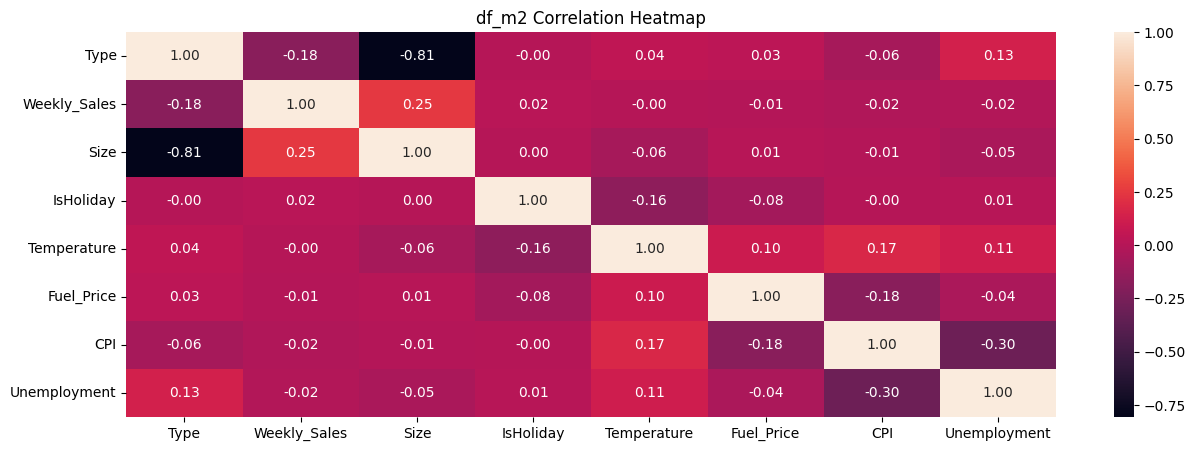

In [82]:
# Calculate the correlation matrix
df_m2_corr = df_m2_weekly_sales.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept']).dropna().corr()

# Create a heatmap
plt.figure(figsize=(15, 5))  
sns.heatmap(df_m2_corr, annot=True, fmt=".2f")
plt.title("df_m2 Correlation Heatmap")
plt.show()

In [83]:
# This heatmap also shows 'Type' and 'Size' features have high correlaton and also relationship with weekly_sales.
# other features are weak correlation with weekly_sales.
# filter null values into separate dataframe and reset index order
df_null = df_m2[df_m2['Weekly_Sales'].isnull()]
df_null.reset_index(drop=True, inplace=True)

# also filter non-null values into separate dataframe and reset index order
df_notnull = df_m2[df_m2['Weekly_Sales'].notnull()]
df_notnull.reset_index(drop=True, inplace=True)

# make vector(x) and label(y) variables
x = df_notnull.drop(columns=['Weekly_Sales', 'diff'], axis=1)
y = df_notnull['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Random Forest algorithm performs well to predict unseen data
model = RandomForestRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}
print(metrics)

{'R2': 0.9770696216165823, 'Mean Absolute Error': 1357.7686152433873, 'Mean Squared Error': 11624463.698614705, 'Root Mean Squared Error': 3409.466776288443}


In [84]:
import pickle

#save the model to pickle
with open("model2.pkl", 'wb') as f:
     pickle.dump(model, f)

In [ ]:
# # conclusion :

In [ ]:
# df_m1

{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9962977059898378, 'R2_test': 0.9742634686561732}

{'R2': 0.9737178130306225, 'MAE': 1434.254303695727, 'MSE': 13323649.668453334, 'RMSE': 3650.157485431736}

In [ ]:
# df_m2

{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9967069973143954, 'R2_test': 0.9765555649166456}

{'R2': 0.9774999505349639, 'MAE': 1356.8024090382305, 'MSE': 11406310.172905441, 'RMSE': 3377.3229299114173}

In [85]:
df_5.describe()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,markdown
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,420212.000000,551479.000000,551479.000000,551479.000000,551479.000000,280405.000000,207897.000000,254619.000000,248649.000000,281341.000000,508176.000000,508176.000000,551479.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,16033.114591,136073.691863,0.071905,58.703624,3.413010,7369.403469,3489.575965,1859.728572,3355.891061,4261.631495,172.200115,7.775470,0.510157
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22729.492116,61207.331445,0.258330,18.685408,0.427725,9439.253385,8920.862286,11633.662079,6889.409946,13679.851274,39.595683,1.863253,0.499897
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,0.010000,34875.000000,0.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,0.000000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,2120.130000,93638.000000,0.000000,45.160000,3.050000,2014.470000,74.240000,7.330000,319.190000,1524.870000,132.529129,6.614000,0.000000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7661.700000,128107.000000,0.000000,59.940000,3.524000,5011.720000,397.960000,41.390000,1202.440000,2825.360000,182.517732,7.771000,1.000000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,20271.265000,202505.000000,0.000000,73.160000,3.746000,9264.480000,2359.440000,177.270000,3380.280000,4930.020000,213.871114,8.549000,1.000000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,1.000000


In [88]:
df_m1_weekly_sales.describe()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,15632.818932,136073.691863,0.071905,58.703624,3.413010,7039.897842,3040.666984,1248.542743,3203.705114,4796.838124,172.628461,7.701336
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22600.260996,61207.331445,0.258330,18.685408,0.427725,7999.382029,7643.159713,9322.434776,6307.439552,11225.088784,39.771746,1.862790
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,0.010000,34875.000000,0.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,1841.000000,93638.000000,0.000000,45.160000,3.050000,2459.510000,78.986600,8.930000,249.812300,2062.040000,132.693226,6.529000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7252.320000,128107.000000,0.000000,59.940000,3.524000,5479.504700,281.300000,32.739300,1265.912500,3570.810000,182.544590,7.706000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,19803.885000,202505.000000,0.000000,73.160000,3.746000,8819.300400,1942.150000,106.950000,3307.621600,5436.311000,214.417648,8.523000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [89]:
df_m1_weekly_sales.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']).describe()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,15632.818932,136073.691863,0.071905,58.703624,3.413010,172.628461,7.701336
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22600.260996,61207.331445,0.258330,18.685408,0.427725,39.771746,1.862790
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,0.010000,34875.000000,0.000000,-7.290000,2.472000,126.064000,3.684000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,1841.000000,93638.000000,0.000000,45.160000,3.050000,132.693226,6.529000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7252.320000,128107.000000,0.000000,59.940000,3.524000,182.544590,7.706000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,19803.885000,202505.000000,0.000000,73.160000,3.746000,214.417648,8.523000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,228.976456,14.313000


In [90]:
df_m2_weekly_sales.describe()

,Day,Month,Year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
count,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000,551479.000000
mean,15.653488,6.277180,2011.392758,22.270485,44.603013,1.594791,15638.550530,136073.691863,0.071905,58.703624,3.413010,172.629888,7.700628
std,8.776044,3.340134,1.054086,12.796872,30.416079,0.669624,22702.450288,61207.331445,0.258330,18.685408,0.427725,39.773440,1.863002
min,1.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,0.010000,34875.000000,0.000000,-7.290000,2.472000,126.064000,3.684000
25%,8.000000,3.000000,2010.000000,11.000000,19.000000,1.000000,1827.323400,93638.000000,0.000000,45.160000,3.050000,132.693226,6.529000
50%,16.000000,6.000000,2011.000000,22.000000,38.000000,1.000000,7242.500000,128107.000000,0.000000,59.940000,3.524000,182.544590,7.706000
75%,23.000000,9.000000,2012.000000,33.000000,74.000000,2.000000,19778.780000,202505.000000,0.000000,73.160000,3.746000,214.417648,8.523000
max,31.000000,12.000000,2013.000000,45.000000,99.000000,3.000000,693099.360000,219622.000000,1.000000,101.950000,4.468000,228.976456,14.313000


In [91]:
df_5.drop(columns=['diff'],inplace=True)

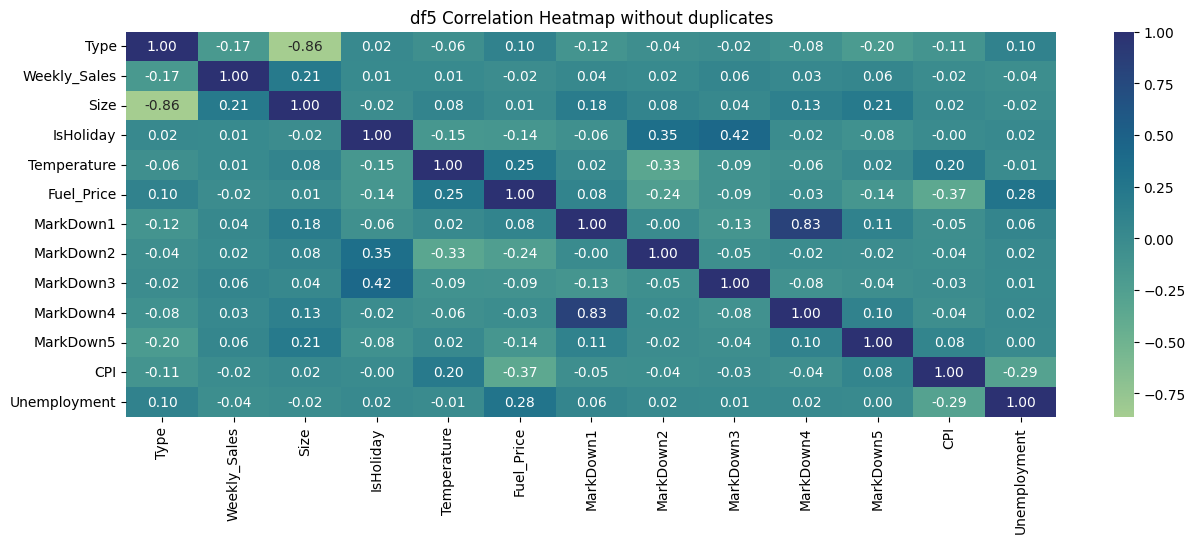

In [100]:
df5_corr = df_5.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept','markdown']).dropna().corr()
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(df5_corr,cmap='crest',annot=True, fmt=".2f")
plt.title("df5 Correlation Heatmap without duplicates")
plt.show()

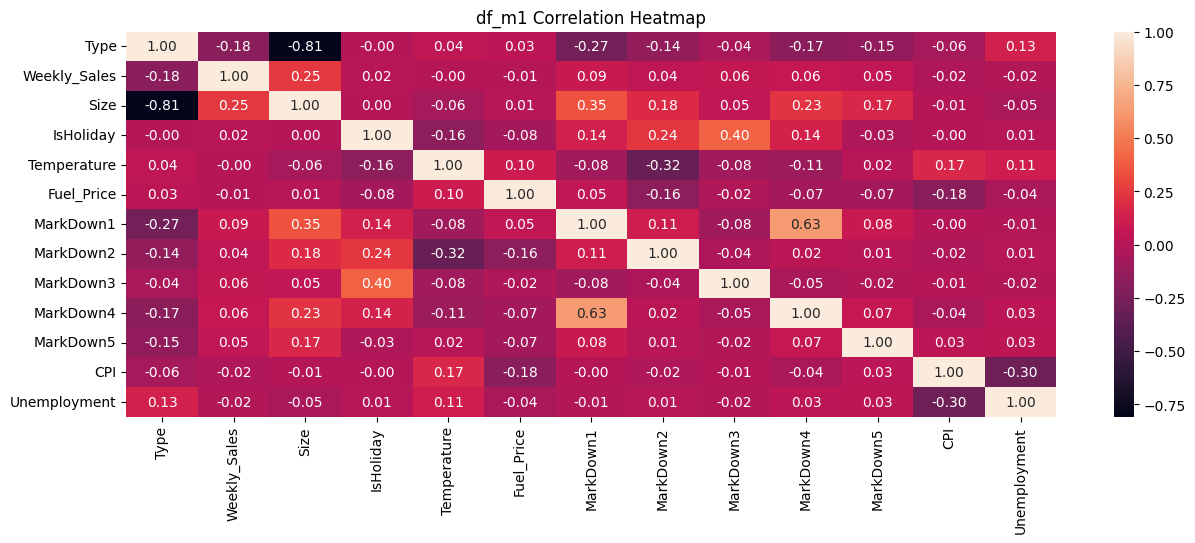

In [101]:
df_m1_corr = df_m1_weekly_sales.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept']).dropna().corr()
plt.figure(figsize=(15, 5))
sns.heatmap(df_m1_corr, annot=True, fmt=".2f")
plt.title("df_m1 Correlation Heatmap")
plt.show()

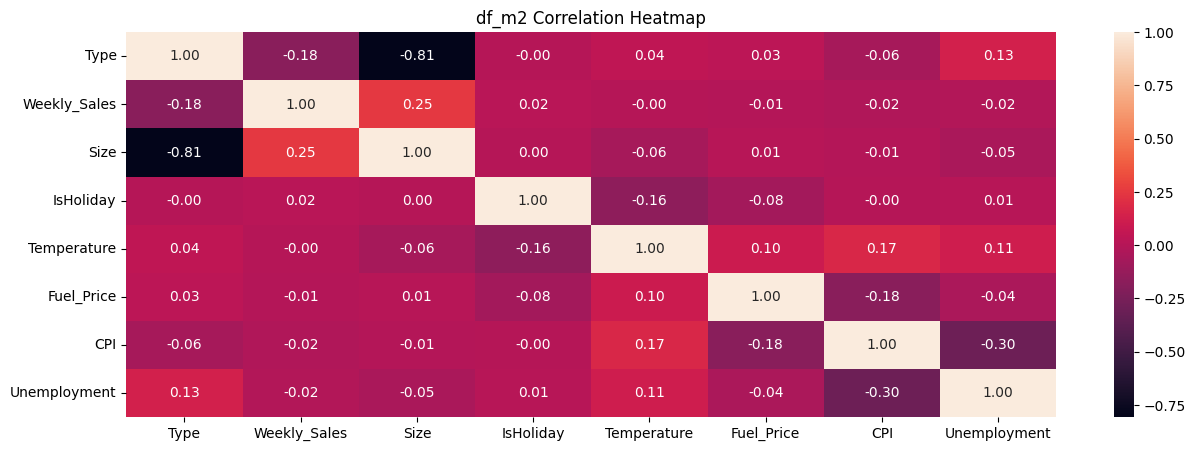

In [102]:
df_m2_corr = df_m2_weekly_sales.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept']).dropna().corr()
plt.figure(figsize=(15, 5))
sns.heatmap(df_m2_corr, annot=True, fmt=".2f")
plt.title("df_m2 Correlation Heatmap")
plt.show()

In [104]:
with open(r"model1_markdown.pkl", 'rb') as f1:
    pred_model = pickle.load(f1)

y_pred1 = pred_model.predict(np.array([[5,2,2010,1,1,1,151315,0,42.31,2.6,7154.4,6710.3,146.1,16555.1,4661.7,211,8.1]]))
y_pred1[0] 

d:\guviproject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


25161.010799999985

In [105]:
with open(r"model2.pkl", 'rb') as f1:
    pred_model = pickle.load(f1)

y_pred1 = pred_model.predict(np.array([[5,2,2010,1,1,1,151315,0,42.31,2.6,211,8.1]]))
y_pred1[0]

d:\guviproject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


24606.8717

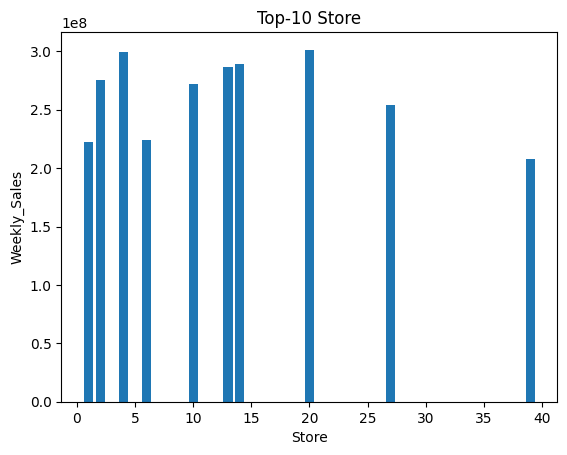

In [49]:
top_n = 10
x_col = 'Store'
y_col = 'Weekly_Sales'

# Create a frequency table for the "Product" column
table = df_5.groupby(x_col)[y_col].sum().sort_values(ascending=False)

# Print the frequency table
# print(frequency_table)

# Create a bar chart
plt.bar(table.index[:top_n], table.values[:top_n])

# Set the chart title and axes labels
plt.title(f'Top-{min(top_n, len(table.index))} {x_col}')
plt.xlabel(x_col)
plt.ylabel(y_col)

# Display the chart
plt.show()